## Hypothesis Testing

To answer questions, we need to break down a question into a hypothesis. Then we collect data to justify which hypothesis is likely to be true.

An example of this would be whether chocolate or vanilla is a more favored ice cream flavor.

Hypothesis testing and confidence intervals allow for the use of **sample data** to draw conclusions about **an entire population**.

### Setting Up Hypothesis Tests
- H0 is true before we collect data
- H0 usually states there is no effect or that two groups are equal
- The H0 and H1 are competing, non-overlapping hypotheses 
- H1 is what we would like to prove to be true 
- H0 holds some sort of equals sign: `=`, `<=`, `>=`
- H1 holds the opposite sign: `!=`, `<`, `>`

#### Example:
"Innocent until proven guilty" suggests the following hypotheses are true:

- H0: Innocent
- H1: Guilty

### Types of Errors
In the judicial example, we have four possibilities considering the truth of the matter (whether someone is guilty or not) and the jury's decision (whether they considered someone guilty or not):

1. Truth: Guilty, Decision: Guilty *(No Error)*
2. Truth: Innocent, Decision: Guilty *(Type I Error)*
3. Truth: Guilty, Decision: Innocent *(Type II Error)*
4. Truth: Innocent, Decision: Innocent  *(No Error)*

A Type I Error is when the alternative is chosen, but the null is actually true. Also known as a False Positive, they are  denoted by the symbol α or alpha. They are considered the worst of the two possible errors. 

A Type II Error is when the null hypothesis is chosen, but the alternative hypothesis is actually true. Also known as a False Negative, they are denoted by the symbol β or beta.

#### Parachute Example
This example lets you see one of the most extreme cases of errors that might be committed in hypothesis testing. In a type I error, an individual died. In a type II error, you lost 30 dollars.

Usually in hypothesis testing, you choose a type I error threshold, and your hypothesis tests will be created to minimize the type II errors after ensuring the type I error rate is met.

### Common Types of Hypothesis Tests
Hypothesis tests are always performed on **population parameters**, never on statistics. Statistics are values we already have from the data, so it does not make sense to perform hypothesis tests on these values.

Common hypothesis tests include:

- Testing a population mean [(One sample t-test)](http://sites.utexas.edu/sos/guided/inferential/numeric/claim/one-sample-t/)
- Testing the difference in means [(Two-sample t-test)](https://www.isixsigma.com/tools-templates/hypothesis-testing/making-sense-two-sample-t-test/)
- Testing the difference before and after some treatment on the same individual [(Paired t-test)](http://www.statstutor.ac.uk/resources/uploaded/paired-t-test.pdf)
- Testing a population proportion [(One sample z-test)](https://stats.libretexts.org/Bookshelves/Applied_Statistics/Book%3A_Learning_Statistics_with_R_-_A_tutorial_for_Psychology_Students_and_other_Beginners_(Navarro)/13%3A_Comparing_Two_Means/13.01%3A_The_one-sample_z-test)
- Testing the difference between population proportions [(Two sample z-test)](https://cran.r-project.org/web/packages/distributions3/vignettes/two-sample-z-test.html)

You can use one of these sites to provide a t-table or z-table to support one of the above approaches:

- [t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)
- [t-table or z-table](http://www.z-table.com/t-value-table.html)

There are literally hundreds of different hypothesis tests! However, instead of memorizing how to perform all of these tests, you can find the statistic(s) that best estimates the parameter(s) you want to estimate. You can bootstrap to simulate the sampling distribution. Then you can use your sampling distribution to assist in choosing the appropriate hypothesis.

### Methods for Choosing Between Hypotheses
1. Bootstrapping: we simulate the sampling distribution of our statistic and then we can see if our hypothesis is consistent with what we observe in the sampling distribution 
2. Simulating from the Null: Simulating what we believe to be possible under the null and then seeing if our data is actually consistent with that. In other others, we could simulate a sampling distribution from the null hypothesis using characteristics that would be true if our data came from the null. This is what professionals tend to do in a hypothesis test. 

#### Quiz: Hypothesis Testing Using Bootstraping
<center>$ H_{0}: \mu \leqslant 70 $</center>

<center>$ H_{1}: \mu > 70 $</center>

Consider $\mu$ as the average height of all individuals in the dataset. Both coffee drinks and non-coffee drinkers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

df = pd.read_csv('support-files/12_Hypothesis-Testing/coffee_dataset.csv')
df.head(1)

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179


In [2]:
# create a sample from data
sample_df = df.sample(150)

In [3]:
# create bootstrap sample
bootsample = sample_df.sample(150, replace=True)

In [4]:
means = []

for _ in range(int(1e4)):
    bootsample = sample_df.sample(150, replace=True)
    means.append(bootsample['height'].mean())

In [5]:
low, high = np.percentile(means, 2.5), np.percentile(means, 97.5)
low, high

(67.10258508046547, 68.15617490636113)

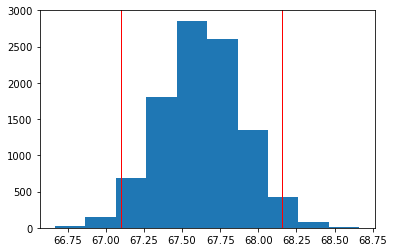

In [6]:
plt.hist(means)
plt.axvline(x=low, color='r', linewidth=1)
plt.axvline(x=high, color='r', linewidth=1);

Since the interval was entirely below 70, it suggests the null hypothesis ($H_{0}$) is actually true. 

#### Quiz: Simulating from the Null 
<center>$ H_{0}: \mu \leqslant 70 $</center>

<center>$ H_{1}: \mu > 70 $</center>

Consider $\mu$ as the average height of all individuals in the dataset. Both coffee drinks and non-coffee drinkers

In [7]:
# create a sample from our data
sample_df = df.sample(150)

In [8]:
# create a bootstrap sample
bootsample = sample_df.sample(150, replace=True)

In [9]:
# bootstrap from the sample
means = []

for _ in range(int(1e4)):
    bootsample = sample_df.sample(150, replace=True)
    means.append(bootsample['height'].mean())

In [10]:
# get the standard deviation
np.std(means)

0.2708022664298498

In [11]:
null_vals = np.random.normal(70, np.std(means), int(1e4))

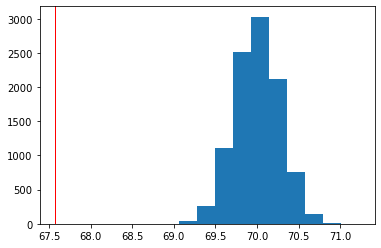

In [12]:
plt.hist(null_vals)
plt.axvline(sample_df['height'].mean(), color='r', linewidth=1);

In [13]:
# checking the sample_df height mean
sample_df['height'].mean()

67.56991579081225

Since our null is that the population mean is less than or equal to 70, we do have evidence to support this claim with our sample mean of 67.57. This suggests **not rejecting $H_{0}$**, our one-sided null hypothesis. If we had a null where we asked if the population mean was equal to 70, then we would reject this null in favor of an alternative that suggested the population mean was actually different from 70. 

#### Quiz: Simulating from the Null

In [14]:
sample_data = df.sample(200)

`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?

$H_{0}: \mu_{1} = \mu_{2} $

$H_{1}: \mu_{1} \neq \mu_{2} $

$\mu_{1}$: average height for all coffee drinkers

$\mu_{2}$: average height for all non-coffee drinkers

`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the second quiz question below.

$H_{0}: \mu_{1} \geqslant \mu_{2} $

$H_{1}: \mu_{1} < \mu_{2} $

$\mu_{1}$: average height for all coffee drinkers

$\mu_{2}$: average height for all non-coffee drinkers

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [15]:
diff_means, means_coff, means_nocoff = [], [], []

for _ in range(int(1e4)):
    bootsample = sample_data.sample(200, replace=True)
    coff_avg = bootsample.query('drinks_coffee == True')['height'].mean()
    nocoff_avg = bootsample.query('drinks_coffee == False')['height'].mean()
    # append the info
    means_coff.append(coff_avg)
    means_nocoff.append(nocoff_avg)
    diff_means.append(coff_avg - nocoff_avg)

In [16]:
# standard deviation for the difference in means
diff_means = np.array(diff_means)
np.std(diff_means)

0.46441474433403507

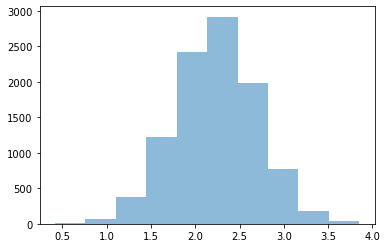

In [17]:
# checking the shape of the distribution 
plt.hist(diff_means, alpha = 0.5); # looks normal!

In [18]:
# standard deviation for the coffee drinkers' height means
means_coff = np.array(means_coff)
np.std(means_coff)

0.25429303380155116

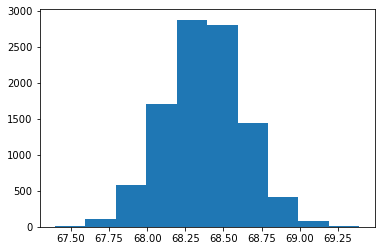

In [19]:
# checking the shape of the distribution 
plt.hist(means_coff);

In [20]:
# standard deviation for the non-coffee drinkers' height means
means_nocoff = np.array(means_nocoff)
np.std(means_nocoff)

0.38660853775728854

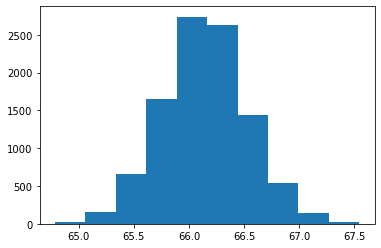

In [21]:
# checking the shape of the distribution 
plt.hist(means_nocoff);

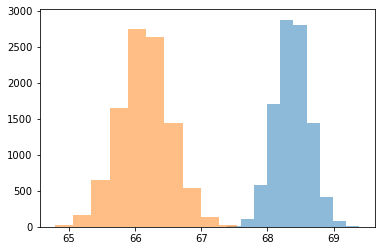

In [22]:
# alternatively, we could plot both on the same chart
plt.hist(means_coff, alpha = 0.5)
plt.hist(means_nocoff, alpha = 0.5); # they both look normal!

Notice the standard deviation with the difference in means is larger than either of the individual. It turns out that this value for the standard deviation of the difference is actually the square root of the sum of the variance of each of the individual sampling distributions. And the mean has a standard deviation of the original draws divided by the square root of the sample size taken. More on this [here](http://www.statsmodels.org/stable/glm.html) and [here](http://onlinestatbook.com/2/sampling_distributions/samp_dist_mean.html).

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

$H_{0}: \mu_{1} - \mu_{2} = 0$

$H_{1}: \mu_{1} - \mu_{2} \neq 0$

> We would expect the sampling distribution to be normal by the Central Limit Theorem, and we know the standard deviation of the sampling distribution of the difference in means from the previous question, so we can use this to simulate draws from the sampling distribution under the null hypothesis.  If there is truly no difference, then the difference between the means should be zero.

In [23]:
null_vals = np.random.normal(0, np.std(diff_means), int(1e4))

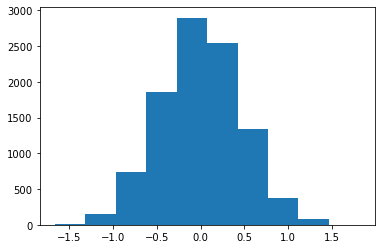

In [24]:
plt.hist(null_vals);